In [1]:
import matplotlib.pyplot as plt
import mpld3
import numpy as np
from tabulate import tabulate

# change these imports???
from svgpathtools import *
from svg_extract_data import *

#%matplotlib notebook
#%matplotlib inline

In [2]:
#paths, attributes = svg2paths('edelweiss_ER_band_GGA3.svg')
doc = Document('edelweiss_ER_band_GGA3.svg')
doc = doc.flatten_all_paths()

In [3]:
print (doc[0].path[0].start.real)
print(len(doc[0].path))
print (doc[0].path[0].length())

34.730800000000016
4
140.33000000000004


In [4]:
mpld3.enable_notebook()
# in ER
# paths with 4 lines are error bars, bounding box
# paths with 10 are the bins, huh
# paths with 13 are the resolution curves
# path with 12 is the top/right axis with ticks
# paths wth 5 is left axis with ticks
# paths with 6 is bottom axis with ticks

# in NR
# paths with 8, 13 are the resolution curves
# path with 12 is the top/right axis with ticks
def argand(doc):
    #import matplotlib.pyplot as plt
    #import numpy as np
    path_arr = []
    
    for result in doc:
        path = result.path

        if len(path) == 13: # maybe these are error bars?
            path_arr.append(path)
            #print (path)
            for line in path:
                # if the line is NOT a Bezier curve
                if not hasattr(line, 'control1'):
                    print ("plotting, ", len(path))
                    #print(path)
                    plt.plot([line.start.real,line.end.real],[line.start.imag,line.end.imag],'ro-',label='python')
                    plt.ylim(0,200)
                    plt.xlim(0,200)
                    #break

    return path_arr

plotting,  13
plotting,  13
plotting,  13
plotting,  13
plotting,  13
plotting,  13
plotting,  13
plotting,  13
plotting,  13
plotting,  13
plotting,  13
plotting,  13
plotting,  13
plotting,  13
plotting,  13
plotting,  13
plotting,  13
plotting,  13
plotting,  13
plotting,  13


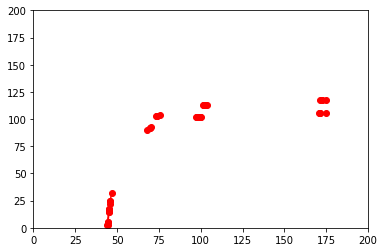

In [5]:
doc = Document('edelweiss_ER_band_GGA3.svg')
doc = doc.flatten_all_paths()

#print (plt.rcParams['interactive'])
mpld3.enable_notebook()
paths = argand(doc)

#argand(doc[6].path)

plt.show()
#print(len(paths)) #2 paths with 13 lines in edelweiss_ER_band_GGA3.svg

In [6]:
doc = Document('edelweiss_ER_band_GGA3.svg')
doc = doc.flatten_all_paths()

xmin, xmax, ymin, ymax = get_dimensions(doc)

width = xmax - xmin
height = ymax - ymin
#height = 147.37939999999998 - 2.5768999999999664
#width = 175.0608 - 34.730800000000016

xaxes, yaxes = get_axes(doc, width, height)
#print (xaxes, yaxes)
#print (xaxes[1] == xaxes[2].reversed())
#print (yaxes[0].reversed())

svg_calibPoints = np.array(get_calib_points(doc, (xaxes, yaxes)))
print(svg_calibPoints)

# these are the points for the ER graph
graph_points = np.array([(0,0), (50,0), (100,0), (150,0), (200,0), (0,0.05), (0,0.1), (0,0.15)])

# these are the points for the NR graph
#graph_points = np.array([(0,0), (50,0), (100,0), (150,0), (200,0), (0,0.025), (0,0.05), (0,0.075), (0, 0.1)])
#print (graph_points)
#xmin, ymin = np.amin(graph_points, axis=0)
xcalib_fn, ycalib_fn = calib(graph_points, svg_calibPoints)
print(xcalib_fn(54.4), ycalib_fn(64.4))
print(xcalib_fn(68.8), ycalib_fn(86))


34.73079000000004 175.06081 1.6618999999999744 147.37939999999998
[[ 34.7308  147.3794 ]
 [104.89579   2.5769 ]
 [175.06079   2.5769 ]
 [ 34.7308   50.8719 ]
 [139.93829   2.5769 ]
 [ 69.85455 147.3794 ]
 [104.8958  147.3794 ]
 [ 34.7308    2.5769 ]
 [ 34.7308   99.0844 ]
 [ 34.73079   2.5769 ]
 [175.0608  147.3794 ]
 [ 69.85454   2.5769 ]
 [139.9383  147.3794 ]]
28.015767694788522 0.08595908661429012
48.54357026934723 0.06358123501749227


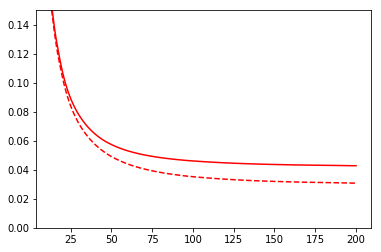

In [7]:
#paths[0].point(1)
x_arr = np.linspace(0,1,100)
path0_arr = np.array([(paths[0].point(x).real, paths[0].point(x).imag) for x in x_arr])
path1_arr = np.array([(paths[1].point(x).real, paths[1].point(x).imag) for x in x_arr])
#print(path0_arr[1:5,:])
plt.plot(xcalib_fn(path0_arr[:,0]), ycalib_fn(path0_arr[:,1]),'r')
plt.plot(xcalib_fn(path1_arr[:,0]), ycalib_fn(path1_arr[:,1]),'r--')
plt.ylim(0,0.15)
plt.show()

table = np.column_stack([xcalib_fn(path0_arr[:,0]), ycalib_fn(path0_arr[:,1]), xcalib_fn(path1_arr[:,0]), ycalib_fn(path1_arr[:,1])])
#print(table)
headers=["'Erecoil (keV) for aH=0.035'", "'ER yield width for aH=0.035'", "'Erecoil (keV) for aH=0.02'", "'ER yield width for aH=0.02'"]
#print (tabulate(table, headers=headers, tablefmt="plain", numalign="left"))

#with open("edelweiss_ER_band_GGA3_curveData.txt", "w") as text_file:
#    print(tabulate(table, headers=headers, tablefmt="plain", numalign="left"), file=text_file)

In [8]:
idx = 5
print(paths[idx], attributes[idx])

print("path is continuous? ", paths[idx].iscontinuous())
print("path is closed? ", paths[idx].isclosed())

IndexError: list index out of range

In [ ]:
#paths[idx].isclosed()
